In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
A = pd.read_csv('C:/Users/Pranita/DL_P/Notebooks/DATA/digitsnpixels.csv')

In [6]:
## Exploratory Data Analysis
print(f"There are {A.shape[0]} rows and {A.shape[1]} columns")
A.head()

There are 42000 rows and 785 columns


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Separate features X (independent variables) and target/label y (dependent variable)
X=A.to_numpy()[:,1:]
y=A.to_numpy()[:,0]

In [20]:
# the value range of X
X.min(),X.max()

(0, 255)

In [21]:
# the array shape of a single data (image)
X[0].shape
np.sqrt(784)

28.0

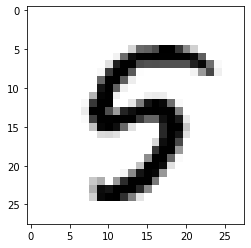

In [25]:
# reshape the image data into 2D array, and plot the image
plt.imshow(X[8].reshape(28,28),cmap=plt.cm.binary)

In [26]:
y[8]

5

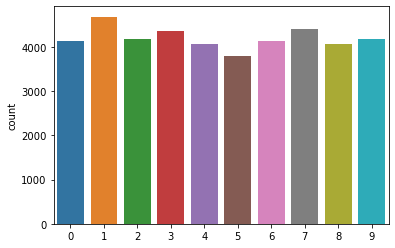

In [27]:
# count and show the number of data for each label/target y
sns.countplot(y)

In [29]:
# ## Data Preprocessing

# normalizing features (pixels)
X = X / 255.0

# one-hot-encoding target (digit 0-9)
y = tf.keras.utils.to_categorical(y)

#This function returns a matrix of binary values (either ‘1’ or ‘0’).
#It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [31]:
# create train and validation data
from sklearn.model_selection import train_test_split

xtrain,xval,ytrain,yval=train_test_split(X,y,test_size=0.2)

In [33]:
# reshape data to fit Keras's input configuration (rank 4 tensor: (rows, pixel, pixel, channel))

xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xval=xval.reshape(xval.shape[0],28,28,1)

In [38]:
# Build Keras Model
model=tf.keras.Sequential()

# add first convolution layer
model.add(tf.keras.layers.Convolution2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))

#How much u wish to read and recognize for maxpooling
# add first pooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#add regularization
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

# add second convolution layer
model.add(tf.keras.layers.Convolution2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))

# add second pooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#add regularization
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

# flatten the array (from 2D to 1D)
model.add(tf.keras.layers.Flatten())

#add first fully connected layer
model.add(tf.keras.layers.Dense(units=30,activation="relu"))

#add second fully connected layer
model.add(tf.keras.layers.Dense(units=20,activation="relu"))

#add output layer (0-9 classes)
model.add(tf.keras.layers.Dense(units=10,activation="softmax"))

#compile model
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# show the network architecture
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 10)        40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 10)        910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 5, 10)         

In [40]:
#Train Model
# define early stopping
callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3)

# fit the model and save the information in history
history=model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=50,
    validation_data=(xval,yval),
    callbacks=[callback]
)

Epoch 1/50
525/525 [==============================] - 19s 36ms/step - loss: 0.7409 - accuracy: 0.7542 - val_loss: 1.4055 - val_accuracy: 0.6325
Epoch 2/50
525/525 [==============================] - 19s 36ms/step - loss: 0.2974 - accuracy: 0.9054 - val_loss: 0.1633 - val_accuracy: 0.9489
Epoch 3/50
525/525 [==============================] - 18s 35ms/step - loss: 0.2470 - accuracy: 0.9208 - val_loss: 0.1132 - val_accuracy: 0.9635
Epoch 4/50
525/525 [==============================] - 19s 36ms/step - loss: 0.2254 - accuracy: 0.9268 - val_loss: 0.1076 - val_accuracy: 0.9670
Epoch 5/50
525/525 [==============================] - 18s 35ms/step - loss: 0.2084 - accuracy: 0.9338 - val_loss: 0.0920 - val_accuracy: 0.9710
Epoch 6/50
525/525 [==============================] - 18s 35ms/step - loss: 0.2010 - accuracy: 0.9356 - val_loss: 0.0981 - val_accuracy: 0.9674
Epoch 7/50
525/525 [==============================] - 18s 35ms/step - loss: 0.1868 - accuracy: 0.9387 - val_loss: 0.0954 - val_accuracy:

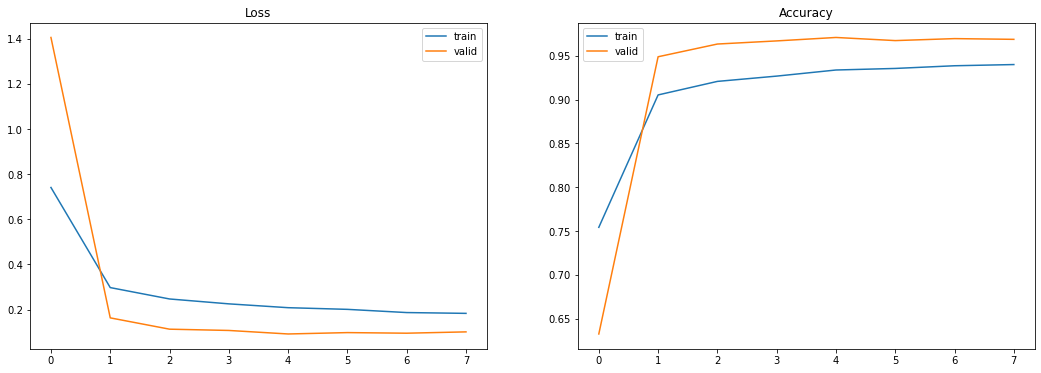

In [47]:
# plot history
fig, ax = plt.subplots(1, 2, figsize=(18,6))
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='valid')
ax[1].plot(history.history['accuracy'], label='train')
ax[1].plot(history.history['val_accuracy'], label='valid')
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[0].legend(); ax[1].legend();

In [48]:
## Evaluation on Validation Data

results=model.evaluate(xval,yval,batch_size=50)

168/168 [==============================] - 2s 11ms/step - loss: 0.1013 - accuracy: 0.9688


In [52]:
print(f"val loss: {results[0]} and val acc: {results[1]}")

val loss: 0.10125254094600677 and val acc: 0.9688095450401306


In [57]:
# get probabilities
probabilities=model.predict(xval)

# get prediction
ypred=np.argmax(probabilities,axis=1)